In [1]:
import seaborn as sns
from sklearn import preprocessing
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  
matplotlib.style.use('ggplot')
%matplotlib inline
import math
import matplotlib as mpl
import plotly
import colorsys
plt.style.use('seaborn-talk')
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division
import pylab
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import colors as mcolors

In [2]:
pd.set_option('display.max_columns', 1000)
plt.rcParams['figure.figsize'] = (17.0, 6.0)
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

In [3]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data-Update.csv')
df.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (16,17,61,81) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,No,NaN,NaN,NaN,NaN,NaN,More than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,Software Development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,Female,NaN,NaN,Yes,No,Yes,No,No,No,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Start your own business,NaN,NaN,NaN,English,Married or Domestic Partnership,150.0,6.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,"Some College Credit, No Degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,No,NaN,NaN,NaN,NaN,NaN,"Less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,Male,NaN,NaN,Yes,No,Yes,No,No,Yes,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,NaN,No,No,No,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Work for a nonprofit,Yes,Full-Stack Web Developer,In an office with other developers,English,Single,80.0,6.0,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Yes,Yes,"Some College Credit, No Degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,No,NaN,NaN,NaN,NaN,NaN,More than 1 million,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,Software Development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,Male,NaN,NaN,No,No,Yes,NaN,No,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,13000.0,Yes,No,No,No,Within 7 to 12 months,Yes,NaN,NaN,Yes,Yes,Yes,NaN,NaN,Yes,NaN,NaN

In [4]:
df.describe()

,Age,ChildrenNumber,ExpectedEarning,HomeMortgageOwe,HoursLearning,Income,MoneyForLearning,MonthsProgramming,StudentDebtOwe
count,15367.000000,2314.000000,7200.000000,1371.000000,16714.000000,7623.000000,16577.000000,17084.000000,3362.000000
mean,27.691872,1.832325,56169.169306,166541.105033,15.609250,43169.357864,957.299753,20.790447,31602.625521
std,8.559239,0.972813,74811.725422,137761.450348,15.283681,61812.293272,5003.003169,41.722826,39383.187732
min,0.000000,1.000000,6000.000000,1000.000000,0.000000,6000.000000,0.000000,0.000000,100.000000
25%,22.000000,1.000000,30000.000000,72000.000000,5.000000,17000.000000,0.000000,3.000000,9536.500000
50%,26.000000,2.000000,50000.000000,140000.000000,10.000000,33000.000000,10.000000,9.000000,20000.000000
75%,32.000000,2.000000,65000.000000,215000.000000,20.000000,55000.000000,200.000000,24.000000,40000.000000
max,90.000000,9.000000,1000000.000000,1000000.000000,168.000000,1000000.000000,210000.000000,744.000000,500000.000000


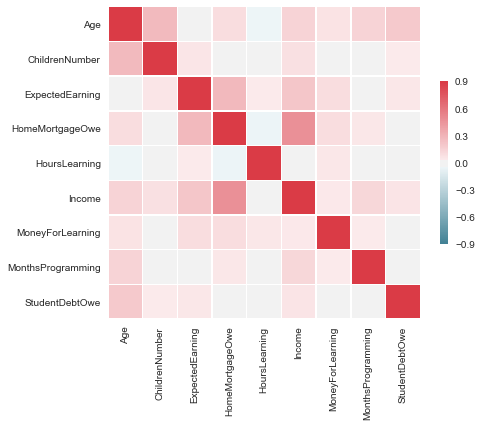

In [5]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
f, ax = plt.subplots(figsize=(7, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [6]:
df.isnull().sum()

Age                        2808
AttendedBootcamp            466
BootcampFinish            17106
BootcampLoanYesNo         17096
BootcampName              17226
BootcampRecommend         17102
ChildrenNumber            15861
CityPopulation             2821
CodeEventConferences      16566
CodeEventDjangoGirls      18010
CodeEventFCC              16467
CodeEventGameJam          17885
CodeEventGirlDev          17878
CodeEventHackathons       16198
CodeEventMeetup           15703
CodeEventNodeSchool       17729
CodeEventNone             17099
CodeEventOther            17605
CodeEventRailsBridge      18042
CodeEventRailsGirls       18043
CodeEventStartUpWknd      17631
CodeEventWkdBootcamps     17628
CodeEventWomenCode        17694
CodeEventWorkshops        16422
CommuteTime                8929
CountryCitizen             2793
CountryLive                2839
EmploymentField           10059
EmploymentFieldOther      17097
EmploymentStatus           3830
                          ...  
Resource

In [7]:
most_common_ages = df.groupby(by='Age').size().sort_values(ascending=False).head(10)

In [8]:
print (most_common_ages)

Age
24.0    994
26.0    933
25.0    922
23.0    895
22.0    853
27.0    852
21.0    840
20.0    742
28.0    728
29.0    648
dtype: int64


In [9]:
data = pd.read_csv("2017-fCC-New-Coders-Survey-Data-Update.csv")

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (16,17,61,81) have mixed types. Specify dtype option on import or set low_memory=False.



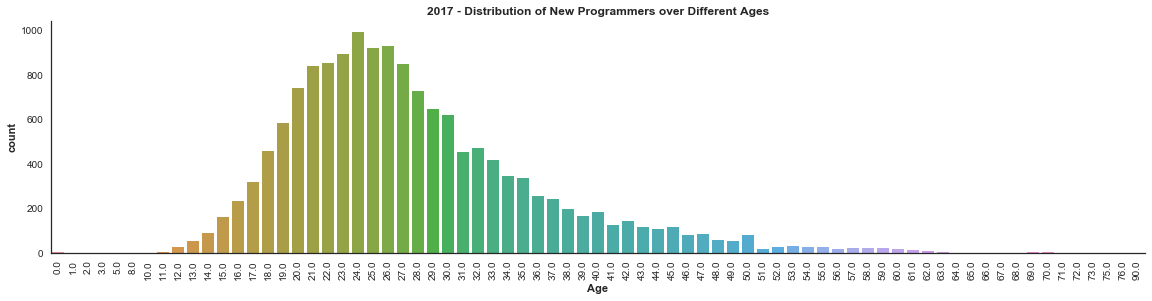

In [10]:
g = sns.factorplot("Age", data=data, aspect=4, kind="count")
g.set_xticklabels(rotation=90)
g = plt.title("2017 - Distribution of New Programmers over Different Ages")

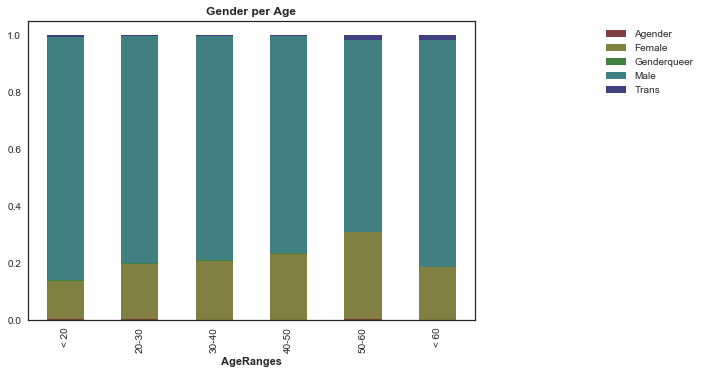

In [11]:
df_ageranges = df.copy()
bins=[0, 20, 30, 40, 50, 60, 100]
df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'], bins, labels=["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"]) 
df2 = pd.crosstab(df_ageranges.AgeRanges,df_ageranges.Gender).apply(lambda r: r/r.sum(), axis=1)
N = len(df_ageranges.AgeRanges.value_counts().index)
HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
ax1 = df2.plot(kind="bar", stacked=True, color= RGB_tuples, title="Gender per Age")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,labels, bbox_to_anchor=(1.51, 1))

In [12]:
most_common_gender = df.groupby(by='Gender').size().sort_values(ascending=False).head(10)

In [13]:
print (most_common_gender)

Gender
Male           12344
Female          2931
Genderqueer       72
Trans             70
Agender           37
dtype: int64


In [14]:
most_common_bootcamp = df.groupby(by='BootcampName').size().sort_values(ascending=False).head(10)

In [15]:
print (most_common_bootcamp)

BootcampName
General Assembly             58
App Academy                  51
IronHack                     49
The Iron Yard                40
Lighthouse Labs              38
Dev Bootcamp                 31
Hackbright Academy           30
Hack Reactor                 27
Nashville Software School    25
Flatiron School              20
dtype: int64


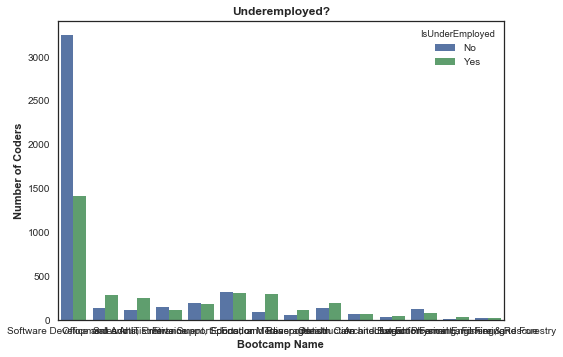

In [16]:
ax = sns.countplot(data=df, x='EmploymentField', hue='IsUnderEmployed')

_ = (ax.set_title('Underemployed?'),
     ax.set_xlabel('Bootcamp Name'),
     ax.set_ylabel('Number of Coders'),
    )


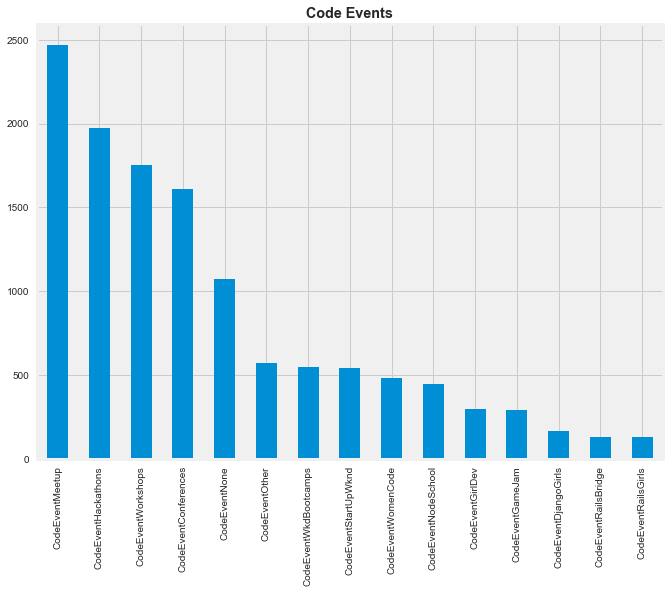

In [17]:
plt.style.use('fivethirtyeight')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

values = df[['CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops' ]].count()
bar = values.sort_values(ascending=False).plot.bar()
g = plt.title("Code Events")


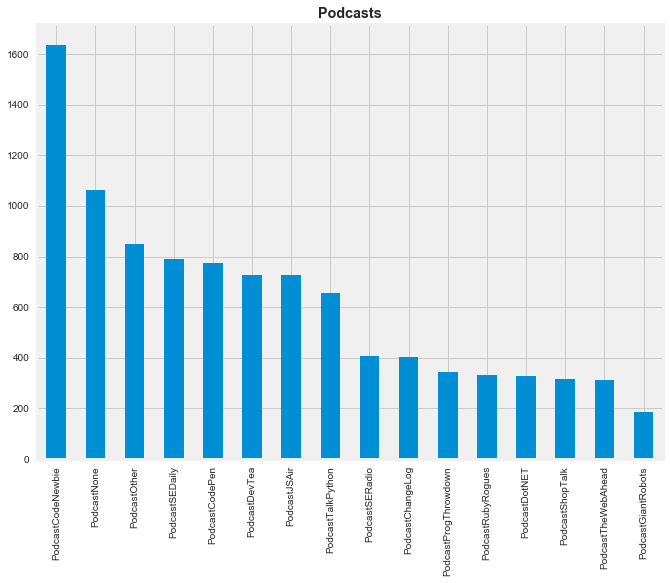

In [18]:
values = data[['PodcastChangeLog', 'PodcastCodeNewbie', 'PodcastCodePen', 'PodcastDevTea', 'PodcastDotNET', 'PodcastGiantRobots', 'PodcastJSAir', 'PodcastNone', 'PodcastOther', 'PodcastProgThrowdown', 'PodcastRubyRogues', 'PodcastSEDaily', 'PodcastSERadio', 'PodcastShopTalk', 'PodcastTalkPython', 'PodcastTheWebAhead' ]].count()

bar = values.sort_values(ascending=False).plot.bar()

g = plt.title("Podcasts")

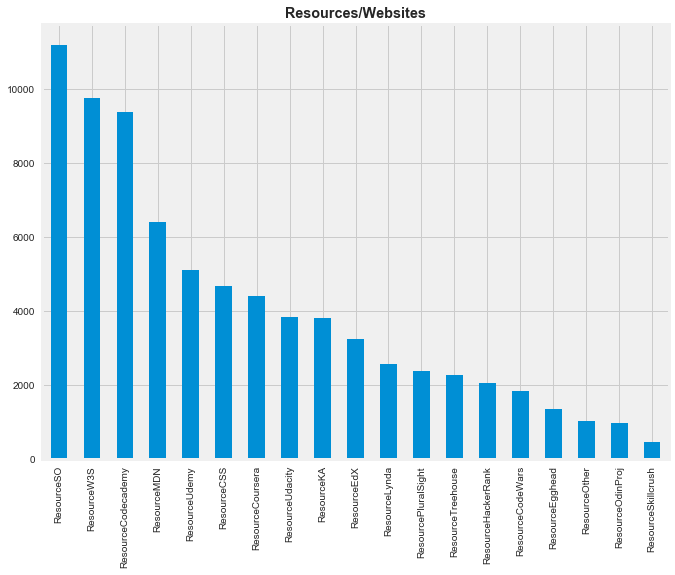

In [19]:
values = data[['ResourceCodecademy', 'ResourceCodeWars', 'ResourceCoursera', 'ResourceCSS', 'ResourceEdX', 'ResourceEgghead', 'ResourceHackerRank', 'ResourceKA', 'ResourceLynda', 'ResourceMDN', 'ResourceOdinProj', 'ResourceOther', 'ResourcePluralSight', 'ResourceSkillcrush', 'ResourceSO', 'ResourceTreehouse', 'ResourceUdacity', 'ResourceUdemy', 'ResourceW3S' ]].count()

bar = values.sort_values(ascending=False).plot.bar()

g = plt.title("Resources/Websites")


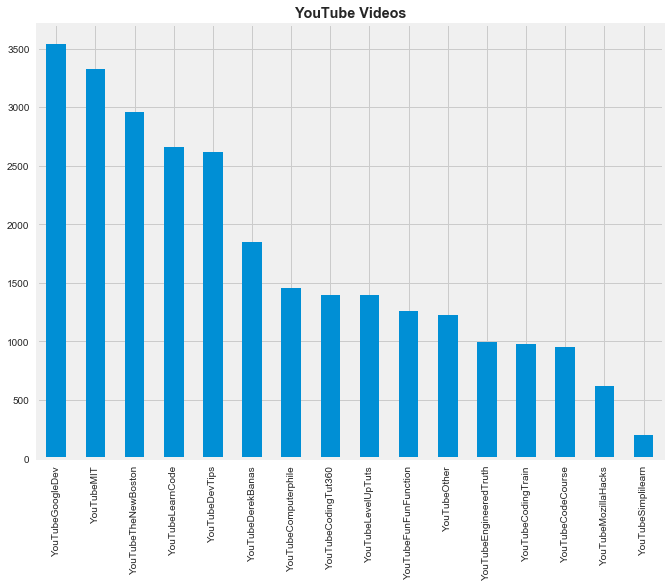

In [20]:
values = data[['YouTubeCodeCourse', 'YouTubeCodingTrain', 'YouTubeCodingTut360', 'YouTubeComputerphile', 'YouTubeDerekBanas', 'YouTubeDevTips', 'YouTubeEngineeredTruth', 'YouTubeFunFunFunction', 'YouTubeGoogleDev', 'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT', 'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn', 'YouTubeTheNewBoston' ]].count()

bar = values.sort_values(ascending=False).plot.bar()

g = plt.title("YouTube Videos")


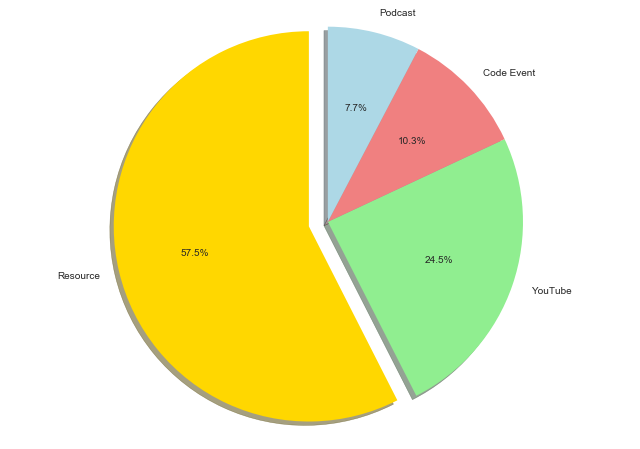

In [21]:
labels = 'Resource', 'YouTube', 'Code Event', 'Podcast'
sizes = [75728, 32245, 13630, 10124]
colors = ['gold', 'lightgreen', 'lightcoral', 'lightblue']
explode = (0.1, 0, 0, 0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['General Assembly', 'App Academy', 'IronHack', 'The Iron Yard', 'Lighthouse Labs', 'Dev Bootcamp', 'Hackbright Academy', 'Hack Reactor', 'Nashville Software School', 'Flatiron School'],
    y=[49, 48, 41, 33, 34, 17, 26, 22, 24, 19],
    name='Recommend Bootcamp'
)
trace2 = go.Bar(
    x=['General Assembly', 'App Academy', 'IronHack', 'The Iron Yard', 'Lighthouse Labs', 'Dev Bootcamp', 'Hackbright Academy', 'Hack Reactor', 'Nashville Software School', 'Flatiron School'],
    y=[9, 2, 8, 6, 4, 14, 4, 4, 1, 1],
    name='Not Recommend Bootcamp'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)
